# Day 2: Wednesday 2nd December 2020 

In [1]:
import pandas


In [2]:
df = pandas.read_csv('workshop/dataset/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.head(3)

In [ ]:
df.tail()

In [ ]:
df.describe()

# Day 3: Monday 7th December 2020

## Subsetting DataFrame

1. **Selecting Rows:** Following code selects third row(which is indexed by the number 2), 3 is exclusive.

In [ ]:
df[2:4]

2. **Selecting more than one rows:**

In [ ]:
result = df[2:4]
result

3. **Selecting a Single Column(Series)**

In [ ]:
df['Name']


4. **Selection of Multiple Columns of a DataFrame**

In [ ]:
df[['Name', 'Age']]

In [ ]:
df[["Name", "Age", "Sex"]]

5. **Accessing a single Value**: 

In [ ]:
s= df['Name']
s[3]

In [ ]:
df['Name'][3]

# Day 4 :

6. **Selecting subset of rows and columns**

In [ ]:
df.loc[1:2, ['Name', 'Age']]

7. **Filtering Data**

In [ ]:
df[df['Age'] > 40 ] 

8. **Filtering Missing Values**: 
- Pandas uses the special value NAN(not a number) to represent missing values.
- Two NAN values are never equal 
- To detect missing values `isnull()` function is used.
- Following command filters rows of `df` having missing values in the **Age** column

In [ ]:
df[df['Age'].isnull()]

# Day 5: 13th December,2020 Sunday

## Manipulating data 
- using aggregation functions (count, sum, mean, median, min, max, prod, std, var)
- result of these functions whether applied to rows or columns is always a number
- setting axis argument = 0 means, operate on columns
- setting axis argument = 1 means, operate on rows

In [ ]:
df.max(axis = 0)

In [ ]:
df.max(axis = 1)

**Binary arithmetic operators can be used e.g. to devide all values in fare column by 100 use the following:**

In [ ]:
df["Age"]/100

**using the apply method**: any function can be applied to a DataFrame or Series e.g. applying square root function to the **Fare** column

In [ ]:
import numpy as np
df["Fare"].apply(np.sqrt)

**In\-line lambda functions:** If we need to design a specific function to apply, we can write an in-line function, commonly known as a lambda function. 
- It is a function without a name. 
- Only necessary to specify the parameters it receives, between the **lambda** keyword and colon **:**


In [ ]:
df["Age"].apply(lambda d: d**2)

**Adding a new column to a DataFrame**

In [ ]:
df["FareByMax"] = df["Fare"] / df["Fare"].max() 
df

## Remove column
- use drop function
- removes indicated rows if axis = 0
- removes columns if axis = 1
- normally return a copy of modified dataframe instead of overwriting
- use inplace = True to overwrite, default is False


In [ ]:
df.drop('FareByMax', axis = 1, inplace = True)
df

## Adding new rows
- use append function
- receives a dictionary as argument Keys= name of columns, Values = associated value
- set ignore_index = True, otherwise index = 0 resulting in error
- unspecified column values are set to NAN 

In [ ]:
df = df.append({"Survived": 1, "Name": 'Imran', "Sex": 'male'}, ignore_index=True)
df

## Remove Rows
- use drop with axis = 0
- use max(df.index) and inplace = True

In [ ]:
df.drop(max(df.index), axis = 0, inplace = True)
df.tail()

**can be used to drop null values:**
- use isnull() function with axis = 0

In [ ]:
index2drop = df[df["Age"].isnull()==True].index
dfDrop = df.drop(index2drop, axis = 0)
dfDrop

**or use dropna function**

In [ ]:
dfDrop = df.dropna(how='any', subset = ["Age"])
dfDrop

## Fill missing values using fillna()

In [ ]:
dfFilled = df.fillna(value = {"Age": 0})
dfFilled

## Sorting: 18th March 2021

In [ ]:
df.sort_values(by='Age', ascending= False, inplace=True)
df.head()

**To revert dataframe back to its original state sort it by index.**

In [ ]:
df.sort_index(axis=0, ascending =True, inplace=True)
df.head()

### Grouping Data

In [ ]:
group = df[['Sex', 'Age']].groupby('Sex').mean()
group.head()

### Rearranging Data

In [ ]:
import numpy 
pivot_table = pandas.pivot_table(df, values=['Survived'],
                                columns=['Sex'],
                                 index=['Pclass'], 
                                 aggfunc={'Survived': numpy.sum})
pivot_table

### Plotting

Pandas DataFrames and Series can be plotted using the `plot` function, which uses the library for graphics **Matplotlib**.

In [ ]:
pivot_table.plot(kind='bar', title="Survival by Sex")

# Feature Engineering
**CREDIT:** Code in this section has been taken from [this kaggle kernel](https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset) 

In [ ]:
train = pandas.read_csv("workshop/dataset/titanic/train.csv")
test = pandas.read_csv("workshop/dataset/titanic/test.csv")


In [ ]:
train.head()

## Aggregating data train and test
The following code results in a list of 2 members, both are dataframes

In [ ]:
full_data = [train, test]

In [ ]:
full_data[1]

In [ ]:
len(full_data)

## Creating a new feature FamilySize
Following is a loop which adds values of two columns `SibSp` and `Parch` plus 1 to compute `FamilySize`

In [ ]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:
full_data[1]

## Filling missing values in Age column
The age column contains missing values indicated by `NaN`. To fill in these values random numbers ranging from `avg_age - std` and `avg_age - std` are generated

In [ ]:

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    
# Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)


## Converting non numeric attributes to numeric 
1. Sex:  Female = 0 , Male = 1
2. Embarked: S = 0, C = 1, Q = 2


In [ ]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [ ]:
full_data[1]

In [ ]:
 # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

<AxesSubplot:>

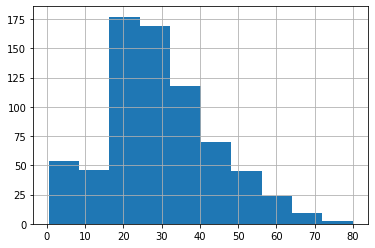

In [4]:
df.Age.hist()

<AxesSubplot:>

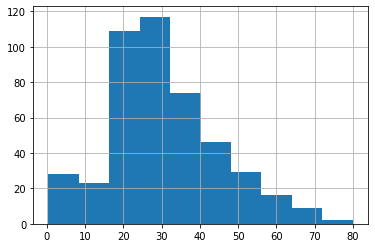

In [6]:
df[df.Sex=="male"].Age.hist()

<AxesSubplot:>

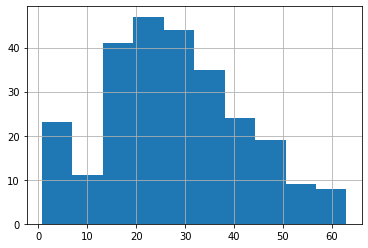

In [8]:
df[df.Sex=="female"].Age.hist()

- Following code subsets the dataframe df based on gender and stores the resulting rows in separate dataframes `male` and `female`  
- The histogram for both dataframes are plotted one top of another. 
- Since histograms plot absolute values and the number of samples representing females are much less than the male samples, a significant difference in the heights of bars can be seen in the resulting histogram.  

<AxesSubplot:>

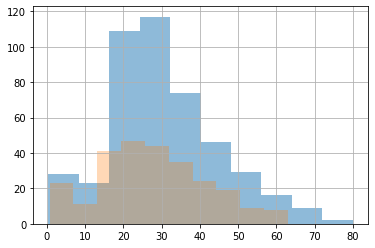

In [4]:

male = df[df.Sex=="male"]
female = df[df.Sex=="female"]
male.Age.hist(alpha = 0.5)
female.Age.hist(alpha = 0.3)


**Normalizing frequencies**
- The frequencies can be normalized by dividing by `n`(number of samples)
- The normalized histogram is called the **Probability Mass Function(PMF)**
- the resulting histogram presents a comparable range of individuals(men and women)

<AxesSubplot:>

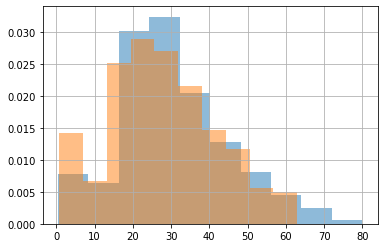

In [13]:
male.Age.hist(alpha = 0.5, density="true")
female.Age.hist(alpha = 0.5, density="true")


**Cumulative Distribution Function(CDF)**
- CDF describes the probability that a real valued random variable X with a given probability will be found to have a value less than or equal to `x`. 
- Following plot shows the CDF of age distribution for both male and female

<AxesSubplot:>

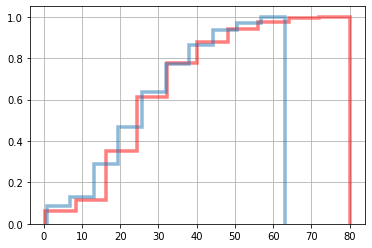

In [12]:
male.Age.hist(alpha = 0.5, density="true", color="red",
              cumulative = True, histtype='step', linewidth=3.5)
female.Age.hist(alpha = 0.5, density="true",
                cumulative = True, histtype='step', linewidth=3.5)


**Outlier Treatment**
- outliers are data samples with a value that is far from the central tendency 
- different rules can be defined to detect outliers, such as:
  + computing samples that are far away from the median
  + computing samples whose values exceed the mean by 2 or 3 standard deviations
  


In [10]:
mean_age = df.Age.mean()
std_age = df.Age.std()
median_age = df.Age.median()

print("Age Statistics: ")
print("=================================")
print("Mean: ", mean_age)
print("Median: ", median_age)
print("Standard Deviation: ", std_age)
print("Min: ", df.Age.min())
print("Max: ", df.Age.max())
print("=================================")
print()
print()
mean_age_male = male.Age.mean()
std_age_male = male.Age.std()
median_age_male = male.Age.median()

print("Age Statistics Male: ")
print("=================================")
print("Mean: ", mean_age_male)
print("Median: ", median_age_male)
print("Standard Deviation: ", std_age_male)
print("Min: ", male.Age.min())
print("Max: ", male.Age.max())
print()
print()
mean_age_female = female.Age.mean()
std_age_female = female.Age.std()
median_age_female = female.Age.median()
print("=================================")
print("Age Statistics Female: ")
print("=================================")
print("Mean: ", mean_age_female)
print("Median: ", median_age_female)
print("Standard Deviation: ", std_age_female)
print("Min: ", female.Age.min())
print("Max: ", female.Age.max())

Age Statistics: 
Mean:  29.69911764705882
Median:  28.0
Standard Deviation:  14.526497332334044
Min:  0.42
Max:  80.0


Age Statistics Male: 
Mean:  30.72664459161148
Median:  29.0
Standard Deviation:  14.678200823816601
Min:  0.42
Max:  80.0


Age Statistics Female: 
Mean:  27.915708812260537
Median:  27.0
Standard Deviation:  14.110146457544134
Min:  0.75
Max:  63.0
